In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Xiao zi you zhong,1982
1,Afraid to Speak,2016
2,Haanduk: The Hidden Corner,2016
3,Akka Pettanam Chelleli Kapuram,1993
4,Ordynat Michorowski,1937


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [6]:
c = cast
t = titles

### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [7]:
c[(c.character == "Batman") | (c.character == 'Superman')].groupby(['character','year']).size().unstack()

year,1938,1940,1943,1948,1949,1950,1951,1953,1954,1955,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
character,,,,,,,,,,,,,,,,,,,,,
Batman,1.0,1.0,1.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,...,3.0,3.0,4.0,2.0,5.0,5.0,4.0,12.0,9.0,4.0
Superman,NaN,NaN,NaN,1.0,NaN,1.0,2.0,NaN,5.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,5.0,2.0


In [8]:
g = c[(c.character == "Batman") | (c.character == 'Superman')].groupby(['year','character']).size().unstack().fillna(0)

In [9]:
#this just gives a list, not two things that can be compared!
#f = c[(c.character == "Batman") | (c.character == 'Superman')].groupby(['character','year']).size().fillna(0)

In [10]:
f = g['Superman'] - g['Batman']
len(f[f>0])

11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [11]:
f = g['Superman'] - g['Batman']
len(f[f<0])

27

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

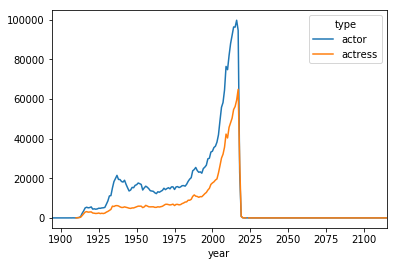

In [12]:
c[(c.type == 'actor')|(c.type == 'actress')].groupby(['year','type']).size().unstack().plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

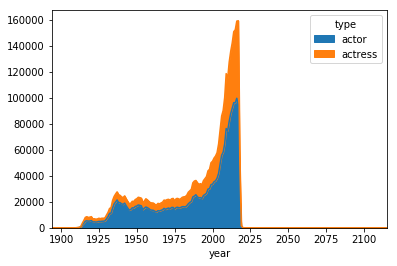

In [13]:
c[(c.type == 'actor')|(c.type == 'actress')].groupby(['year','type']).size().unstack().plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [14]:
h = c[(c.type == 'actor')|(c.type == 'actress')].groupby(['year','type']).size().unstack().fillna(0)

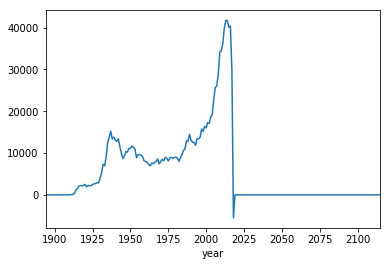

In [15]:
(h['actor'] - h['actress']).plot()

In [16]:
len(h)

124

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

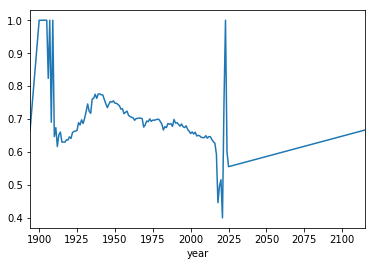

In [17]:
(h['actor']/(h['actress']+h['actor'])).plot()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [21]:
j = c[((c.type == 'actor')|(c.type == 'actress'))&(c.n==2)].groupby(['year','type']).size().unstack().fillna(0)

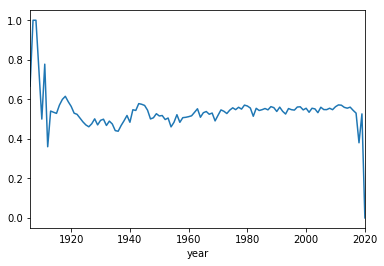

In [22]:
(j['actor']/(j['actress']+j['actor'])).plot()

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [89]:
#k = c[c.n<=3].groupby(['year','type', 'n']).size().unstack(1).fillna(0)
k = c[c.n<=3].groupby(['year','n', 'type']).size().unstack().fillna(0)

In [90]:
k#.unstack()

type       actor  actress
year n                   
1906 1.0     2.0      1.0
     2.0     2.0      1.0
     3.0     0.0      1.0
1907 1.0     1.0      0.0
     2.0     1.0      0.0
     3.0     1.0      0.0
1908 1.0     1.0      0.0
     2.0     2.0      0.0
     3.0     2.0      0.0
1909 1.0     1.0      0.0
1910 1.0     1.0      4.0
     2.0     2.0      2.0
     3.0     3.0      0.0
1911 1.0    16.0      8.0
     2.0    14.0      4.0
     3.0    14.0      4.0
1912 1.0    17.0     12.0
     2.0     9.0     16.0
     3.0    14.0      6.0
1913 1.0    78.0     49.0
     2.0    60.0     51.0
     3.0    73.0     25.0
1914 1.0   229.0    145.0
     2.0   178.0    155.0
     3.0   222.0     91.0
1915 1.0   370.0    303.0
     2.0   339.0    302.0
     3.0   404.0    202.0
1916 1.0   467.0    505.0
     2.0   528.0    397.0
...          ...      ...
2010 3.0  1937.0   1262.0
2011 1.0  2887.0   1189.0
     2.0  2178.0   1632.0
     3.0  2217.0   1387.0
2012 1.0  2880.0   1273.0
     2.0  2196.0   1655.0
     3.0  2260.0   1405.0
2013 1.0  3010.0   1293.0
     2.0  2258.0   1779.0
     3.0  2333.0   1449.0
2014 1.0  3029.0   1370.0
     2.0  2289.0   1834.0
     3.0  2356.0   1505.0
2015 1.0  2970.0   1416.0
     2.0  2290.0   1797.0
     3.0  2314.0   1580.0
2016 1.0  2880.0   1466.0
     2.0  2222.0   1861.0
     3.0  2222.0   1636.0
2017 1.0  2346.0   1592.0
     2.0  1977.0   1752.0
     3.0  1922.0   1494.0
2018 1.0   418.0    549.0
     2.0   344.0    561.0
     3.0   304.0    466.0
2019 1.0    12.0     16.0
     2.0    10.0      9.0
     3.0     7.0     11.0
2020 1.0     4.0      0.0
     2.0     0.0      1.0

[342 rows x 2 columns]

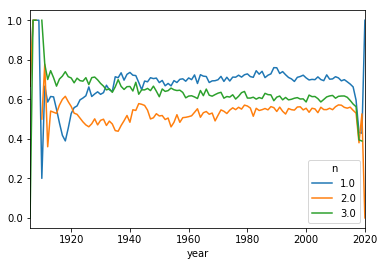

In [98]:
(k['actor']/(k['actress']+k['actor'])).unstack().plot()